In [2]:
#Dependencies and api_keys
import requests
from pprint import pprint
from config import census_key
import json
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
census_original_df = pd.read_csv("./census_output.csv")
census_original_df = census_original_df.drop("Unnamed: 0",axis=1)


In [5]:

census_df = census_original_df["County"].replace(regex=True,to_replace=['Parish','Municipal', 'Borough'],value='County')
census_df = census_df.reset_index()
census_df = census_original_df.groupby(census_original_df["County"]).sum()


In [6]:
county_lookup = pd.read_csv("./quandl_convert.csv")
county_lookup = county_lookup.rename(columns={"FULL1_NAME":"County","County":"County Code"})


In [117]:
county_merge = census_df.merge(county_lookup,on="County")

In [118]:
zil_output = pd.read_csv('./zillow_calc.csv')
zil_output = zil_output.drop("Unnamed: 0",axis=1)
zil_output = zil_output.rename(columns={"County":"County Code"})
zil_output
zil_census_merge = county_merge.merge(zil_output,on="County Code")
zil_census_merge

,County,2009IN,2009NET,2009POP1YR,state,county,2010IN,2010NET,2010POP1YR,2011IN,...,2014 Difference,2015 Difference,2016 Difference,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change
0,"Accomack County, Virginia",431.0,-623.0,721525,969,19,0.0,0.0,0.0,383.0,...,7257.0,374,6025.0,-2.140128,-1.084751,1.345437,-8.350719,5.506571,0.268978,4.321506
1,"Ada County, Idaho",53433.0,8094.0,145223600,6400,400,25963.0,3388.0,73562720.0,45701.0,...,7800.0,14500,24400.0,-8.181316,-7.043949,6.282383,15.661182,4.109589,7.338057,11.504008
2,"Adair County, Missouri",4792.0,1223.0,2643300,3132,108,2245.0,547.0,1321661.0,5211.0,...,4000.0,5400,5400.0,-11.207970,-4.207574,-1.464129,0.000000,5.943536,7.573633,7.040417
3,"Adams County, Colorado",72717.0,10843.0,140486885,2728,341,36404.0,4927.0,69792974.0,73761.0,...,27100.0,35500,31700.0,-3.395785,-0.606061,8.231707,9.746479,13.911704,15.998197,12.315462
4,"Adams County, Idaho",380.0,-194.0,48692,224,42,192.0,-8.0,27321.0,474.0,...,8600.0,11600,38300.0,-10.820669,-3.340150,2.538787,8.940853,5.429293,6.946108,21.444569
5,"Adams County, Illinois",3830.0,-108.0,6557364,1683,99,1622.0,-392.0,3249582.0,3154.0,...,2600.0,3100,1300.0,1.573034,0.331858,1.764057,0.975081,2.789700,3.235908,1.314459
6,"Adams County, Indiana",1221.0,-754.0,1099824,594,33,552.0,-449.0,535872.0,1097.0,...,3800.0,3100,5400.0,-0.597015,0.000000,0.200200,0.099900,3.792415,2.980769,5.042017
7,"Adams County, Mississippi",1592.0,-514.0,1493232,1344,48,605.0,-500.0,776616.0,866.0,...,3000.0,3100,25900.0,1.527615,-1.736111,2.709069,-1.490826,3.492433,3.487064,28.152174
8,"Adams County, North Dakota",286.0,-22.0,41130,684,18,143.0,-39.0,21042.0,226.0,...,0.0,0,3500.0,NaN,NaN,-0.120627,0.000000,0.000000,0.000000,4.227053
9,"Adams County, Ohio",1566.0,-702.0,1052410,1482,38,688.0,-286.0,534755.0,1464.0,...,2600.0,6500,-400.0,10.726073,7.451565,-8.460472,-4.393939,4.120444,9.893455,-0.554017


In [119]:
zil_census_merge.to_csv('./zillow_census_m_OUTPUT.csv')

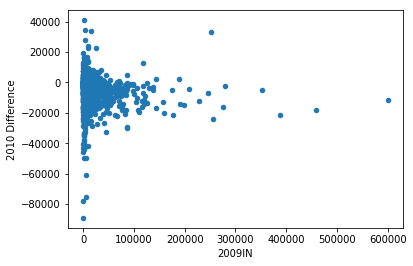

In [120]:
zil_census_merge.plot.scatter("2009IN","2010 Difference" , s=None, c=None)
plt.show()